# 2022 LBG DigData Challenge: Who will pay back their loan?
Author: Lei Zhu (zhuleizju2015@gmail.com)

Introduction: This document is for the 2022 LBG DigData Challenge to understand the different behaviours or attributes between customers who paid back their loans and who did not.

Conclusions: Customers with mortgate homes, small number of payments on the loan, and low ineterst rate seem more likely to pay their loan. Both logistic regression model and decision tree model can predict the customer who pays the loan but not perform good on predict who dose not pay the loan. It might be caused by the inbalance of the data (i.e., 78.68 % ercentage of customers paid their loan) and the relavent features selection process.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import sklearn.metrics as metrics
import re
import math
from matplotlib.cbook import boxplot_stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Challenge 1: Data Strategy Task

In this task, data will be visualised, evaluated, and analysed

### A. Data loading and overview
Read data from LBG Step Up Data Set.xlsx file into data frame 'data'<br>
Check the head and the information of the data. The dataset contains 18324 data with 31 features (columns).

In [2]:
data = pd.read_excel('LBG Step Up Data Set.xlsx')
data.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  object 
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  object 
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

Some statistic information of the data is summarised below. For example, the mean value of annual income and mean loan amount of all customers is 80176.11 and 15522.66, respectively; 78.68 % of all customers paid their loan.

In [5]:
data.describe()

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
count,1.832400e+04,1.832400e+04,18324.000000,18324.000000,18324.000000,17758.000000,9395.000000,9395.000000,17192.000000,17760.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,18324.000000,17714.000000,18324.000000,18324.000000,1.792600e+04
mean,6.832645e+07,8.017611e+04,467.543006,15522.661537,0.138507,13466.600011,2.301863,5728.533475,125.348127,180.750788,...,7.964752,8.575619,8.268525,0.086092,2.274775,11.629284,45.489228,0.142054,24.750109,5.148915e+04
std,4.245703e+07,6.487345e+04,278.099801,9349.294243,0.048223,16550.730832,2.523087,5628.027589,52.996782,95.122321,...,4.847990,7.372691,4.627181,0.440718,1.936068,5.578496,35.907408,0.388198,12.192517,4.970348e+04
min,3.009180e+05,3.000000e+03,30.650000,1000.000000,0.053100,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,3.491424e+07,4.700000e+04,259.302500,8000.000000,0.104900,3129.000000,1.000000,2170.500000,97.000000,116.000000,...,4.000000,3.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,16.000000,2.151850e+04
50%,6.838023e+07,6.500000e+04,397.480000,14000.000000,0.133300,7137.000000,2.000000,4244.000000,129.000000,164.000000,...,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,3.897700e+04
75%,9.730784e+07,9.500000e+04,635.720000,21000.000000,0.169900,18436.500000,3.000000,7357.000000,152.000000,231.000000,...,10.000000,11.000000,11.000000,0.000000,3.000000,14.000000,75.000000,0.000000,32.000000,6.526700e+04
max,1.708249e+08,2.616000e+06,1503.890000,40000.000000,0.309900,341236.000000,28.000000,99609.000000,530.000000,674.000000,...,45.000000,78.000000,49.000000,10.000000,22.000000,50.000000,100.000000,6.000000,110.000000,1.501187e+06


Percentage of customers paid their loan: 78.68 %


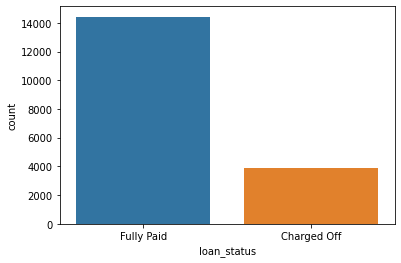

In [6]:
sns.countplot(x="loan_status", data=data)
print('Percentage of customers paid their loan: %.2f %%' % (data.loc[data['loan_status']=='Fully Paid'].shape[0]/len(data)*100))

<AxesSubplot:title={'center':'home_ownership vs loan status'}, xlabel='loan_status', ylabel='count'>

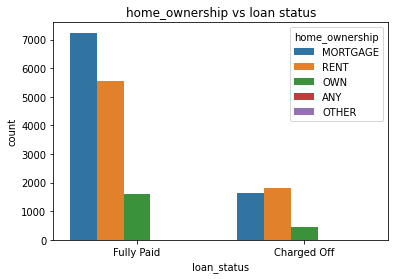

In [13]:
fig, ax = plt.subplots()
ax.set_title('home_ownership vs loan status')
sns.countplot(x='loan_status', hue='home_ownership', data=data ,ax=ax)

In [496]:
data['home_ownership'].value_counts()

MORTGAGE    8880
RENT        7382
OWN         2048
ANY           13
OTHER          1
Name: home_ownership, dtype: int64

###  B. Data cleaning: check missing data

In this step, we check if there are missing data and how many percent of missing data in each feature.<br>
Firstly, let's convert age data into numbers. Follow the data dictionary, change employment year '<1' to '0', and '10+' to '10'.

In [14]:
# remove units from the 'emp_length' column and convert data type from object to number
for i in range(len(data.emp_length)):
    if type(data.emp_length[i])==float and math.isnan(data.emp_length[i]):
        continue
    else:
        if data.emp_length[i][0]!='<':
            data.emp_length[i] = float(re.sub(r'[^0-9]', '', data.emp_length[i]))
        elif data.emp_length[i][0] == '<':
            data.emp_length[i] = 0.0

In [15]:
# 'term' column contains the information of number of payments in months, which ic either 36 or 60. So just remove the unit and convert the data into number
data.term = data.term.apply(lambda x:x[0:3])
data.term = data.term.astype('int64')

Secondly, encode the loan status in the following way: let 0 and 1 represent 'Charged off' and 'Fully Paid', respectively.

In [16]:
encode_map = {'Fully Paid':1, 'Charged Off':0}
data['loan_status'] = data['loan_status'].map(encode_map)

Check the head of the data again.

In [17]:
data.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3.0,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,1
1,14518910,TX,97500.0,1.0,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,1
2,54333324,NY,120000.0,1.0,Senior manager,RENT,806.57,25000,credit_card,36,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,1
3,62247022,CA,130000.0,10.0,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,1
4,71986114,TX,58296.0,10.0,Account Manager,MORTGAGE,41.79,1200,other,36,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,1


Second step, check missing data<br><br>
It can be seen that the percentages of missing data in (a) Number of credit inquiries (searches) in past 12 months, (b) Maximum current balance owed on all revolving accounts, and (c) The number of months since the borrower's last delinquency (missed payment) are significantly high (over 40%).<br><br> 
However, the 'missing data' in 'mths_since_last_delinq' could indicate that the customer have no missed payment recently and is likely to indicate good credit worthiness. Therefore, the data from 'inq_last_12m' and 'max_bal_bc' will not be used to evaluate the cusotmer's loan pay back likelihood; the missing data in 'mths_since_last_delinq' will be filled with the maximum value in this attribute to indicate that these customer might not have missed payment recently. <br><br>
For the rest features, the percentages of missing data are below 7%, which indicate the missing data in these attributes is not expected to cause significant impact on analysing the cusotmer's loan pay back likelihood. In the rest features, thus, the missing data in the rest of the attributes will be filled with the mean value of each attribute, except for the categoric variable 'emp_title', which does not show clear effects on loan status by logic. The 'emp_title' feature will not be studied.

In [18]:
# percentage of missing data in each attribute
data.isnull().sum()/len(data)*100

id                         0.000000
addr_state                 0.000000
annual_inc                 0.000000
emp_length                 6.406898
emp_title                  6.996289
home_ownership             0.000000
installment                0.000000
loan_amnt                  0.000000
purpose                    0.000000
term                       0.000000
int_rate                   0.000000
avg_cur_bal                3.088845
inq_last_12m              48.728444
max_bal_bc                48.728444
mo_sin_old_il_acct         6.177690
mo_sin_old_rev_tl_op       3.077931
mo_sin_rcnt_rev_tl_op      3.077931
mo_sin_rcnt_tl             3.077931
mort_acc                   2.172015
mths_since_last_delinq    49.377865
num_bc_tl                  3.077931
num_il_tl                  3.077931
num_op_rev_tl              3.077931
num_tl_90g_dpd_24m         3.077931
num_tl_op_past_12m         3.077931
open_acc                   0.000000
percent_bc_gt_75           3.328967
pub_rec_bankruptcies       0

In [23]:
# remove attributes with siginificant percentage of missing data whilest not clear indication on how they would impact the predicted likelihood of whether customers pay back their loan
del data['inq_last_12m']
del data['max_bal_bc']
del data['emp_title']

In [24]:
# fill missing data in 'mths_since_last_delinq' with maximum value
data.mths_since_last_delinq.fillna(data.mths_since_last_delinq.max(),inplace= True)

In [25]:
# fill missing data in the rest attributes with mean values 
data.emp_length.fillna(data.emp_length.mean(),inplace= True)
data.avg_cur_bal.fillna(data.avg_cur_bal.mean(),inplace= True)
data.mo_sin_old_il_acct.fillna(data.mo_sin_old_il_acct.mean(),inplace= True)
data.mo_sin_old_rev_tl_op.fillna(data.mo_sin_old_rev_tl_op.mean(),inplace= True)
data.mo_sin_rcnt_rev_tl_op.fillna(data.mo_sin_rcnt_rev_tl_op.mean(),inplace= True)
data.mo_sin_rcnt_tl.fillna(data.mo_sin_rcnt_tl.mean(),inplace= True)
data.mort_acc.fillna(data.mort_acc.mean(),inplace= True)
data.num_bc_tl.fillna(data.num_bc_tl.mean(),inplace= True)
data.num_il_tl.fillna(data.num_il_tl.mean(),inplace= True)
data.num_op_rev_tl.fillna(data.num_op_rev_tl.mean(),inplace= True)
data.num_tl_90g_dpd_24m.fillna(data.num_tl_90g_dpd_24m.mean(),inplace= True)
data.num_tl_op_past_12m.fillna(data.num_tl_op_past_12m.mean(),inplace= True)
data.percent_bc_gt_75.fillna(data.percent_bc_gt_75.mean(),inplace= True)
data.total_bal_ex_mort.fillna(data.total_bal_ex_mort.mean(),inplace= True)

Check again if missing data has been filled

In [26]:
# check again any missing data
data.isnull().sum()/len(data)*100

id                        0.0
addr_state                0.0
annual_inc                0.0
emp_length                0.0
home_ownership            0.0
installment               0.0
loan_amnt                 0.0
purpose                   0.0
term                      0.0
int_rate                  0.0
avg_cur_bal               0.0
mo_sin_old_il_acct        0.0
mo_sin_old_rev_tl_op      0.0
mo_sin_rcnt_rev_tl_op     0.0
mo_sin_rcnt_tl            0.0
mort_acc                  0.0
mths_since_last_delinq    0.0
num_bc_tl                 0.0
num_il_tl                 0.0
num_op_rev_tl             0.0
num_tl_90g_dpd_24m        0.0
num_tl_op_past_12m        0.0
open_acc                  0.0
percent_bc_gt_75          0.0
pub_rec_bankruptcies      0.0
total_acc                 0.0
total_bal_ex_mort         0.0
loan_status               0.0
dtype: float64

In [27]:
data.head()

,id,addr_state,annual_inc,emp_length,home_ownership,installment,loan_amnt,purpose,term,int_rate,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3.0,MORTGAGE,395.66,12000,debt_consolidation,36,0.1149,...,8.575619,8.268525,0.086092,2.274775,16,45.489228,0,23,51489.151623,1
1,14518910,TX,97500.0,1.0,RENT,966.47,35000,debt_consolidation,60,0.2199,...,2.000000,12.000000,0.000000,1.000000,13,87.500000,0,24,84227.000000,1
2,54333324,NY,120000.0,1.0,RENT,806.57,25000,credit_card,36,0.0999,...,2.000000,7.000000,0.000000,1.000000,8,100.000000,0,16,39124.000000,1
3,62247022,CA,130000.0,10.0,RENT,846.17,25225,debt_consolidation,36,0.1269,...,9.000000,3.000000,0.000000,2.000000,8,50.000000,0,24,123331.000000,1
4,71986114,TX,58296.0,10.0,MORTGAGE,41.79,1200,other,36,0.1531,...,7.000000,6.000000,0.000000,0.000000,9,100.000000,0,17,51794.000000,1


Third step, check duplicated data <br> No duplicated data was found.

In [28]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18319    False
18320    False
18321    False
18322    False
18323    False
Length: 18324, dtype: bool

In [29]:
dd = data.duplicated()
print(data.duplicated().sum())
data[dd]

# data.drop_duplicates(inplace=True)

0


,id,addr_state,annual_inc,emp_length,home_ownership,installment,loan_amnt,purpose,term,int_rate,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status


### B. Exploratory Data Analysis
In this step, we do a little bit visualisation of the data distribution to evaluate if there is any outliers in the data.

In [30]:
#Discover and visualize the data to gain insights
print('Variable', '   ', 'count of unique value','  ', 'content')
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

Variable     count of unique value    content
id                   18324	 [300918, 315196, 358926, 368924, 373258]
addr_state              51	 ['AK', 'AL', 'AR', 'AZ', 'CA']
annual_inc            2434	 [3000.0, 6000.0, 7000.0, 7100.0, 7200.0]
emp_length              12	 [0.0, 1.0, 2.0, 3.0, 4.0]
home_ownership           5	 ['ANY', 'MORTGAGE', 'OTHER', 'OWN', 'RENT']
installment          10246	 [30.65, 31.45, 31.88, 32.03, 32.27]
loan_amnt             1111	 [1000, 1050, 1100, 1200, 1300]
purpose                 14	 ['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement']
term                     2	 [36, 60]
int_rate               465	 [0.0531, 0.0532, 0.0542, 0.0579, 0.0593]
avg_cur_bal          12636	 [0.0, 1.0, 13.0, 14.0, 18.0]
mo_sin_old_il_acct     356	 [1.0, 2.0, 3.0, 4.0, 5.0]
mo_sin_old_rev_tl_op   565	 [5.0, 6.0, 8.0, 12.0, 13.0]
mo_sin_rcnt_rev_tl_op   151	 [0.0, 1.0, 2.0, 3.0, 4.0]
mo_sin_rcnt_tl         101	 [0.0, 1.0, 2.0, 3.0, 4.0]
mort_acc          

In [31]:
data2 = data.copy()
data3 = data.copy()

In [32]:
data2.groupby('loan_status').mean()

,id,annual_inc,emp_length,installment,loan_amnt,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
loan_status,,,,,,,,,,,,,,,,,,,,,
0,7.244937e+07,73451.586078,5.988807,490.587033,16482.750896,46.211982,0.161450,10773.377880,121.955370,171.360172,...,7.824193,8.699805,8.510291,0.092944,2.556286,11.921403,47.671026,0.169483,24.491807,50015.134543
1,6.720950e+07,81997.863500,6.042086,461.300117,15262.562422,41.895963,0.132291,14196.224484,126.267263,183.294813,...,8.002831,8.541976,8.203028,0.084236,2.198510,11.550146,44.898154,0.134623,24.820086,51888.479597


Firstly, even 3 features have been removed, there are still too many features to be considered. So we select most relevant variabes: <br> <br> 
So we firstly check the correlation matrix of each remaining feature with our output, loan status. We can see that 'term' and 'int_rate' have much higher magnitude of correlation with loan status, so these two features are selected for the modeling stage. For the rest features with numeric variables, the correlations with loan status are not significant. So we use 'select k best' method to select other most relevant variables. This method is suitable for numeric variables, so categoric variables will be temperoraly drop in this step. Further more, the variable 'id' is not likely to have strong relationship with loan status (user ID is treated as a random varibale here) by logic, so it will not be considered in this step.

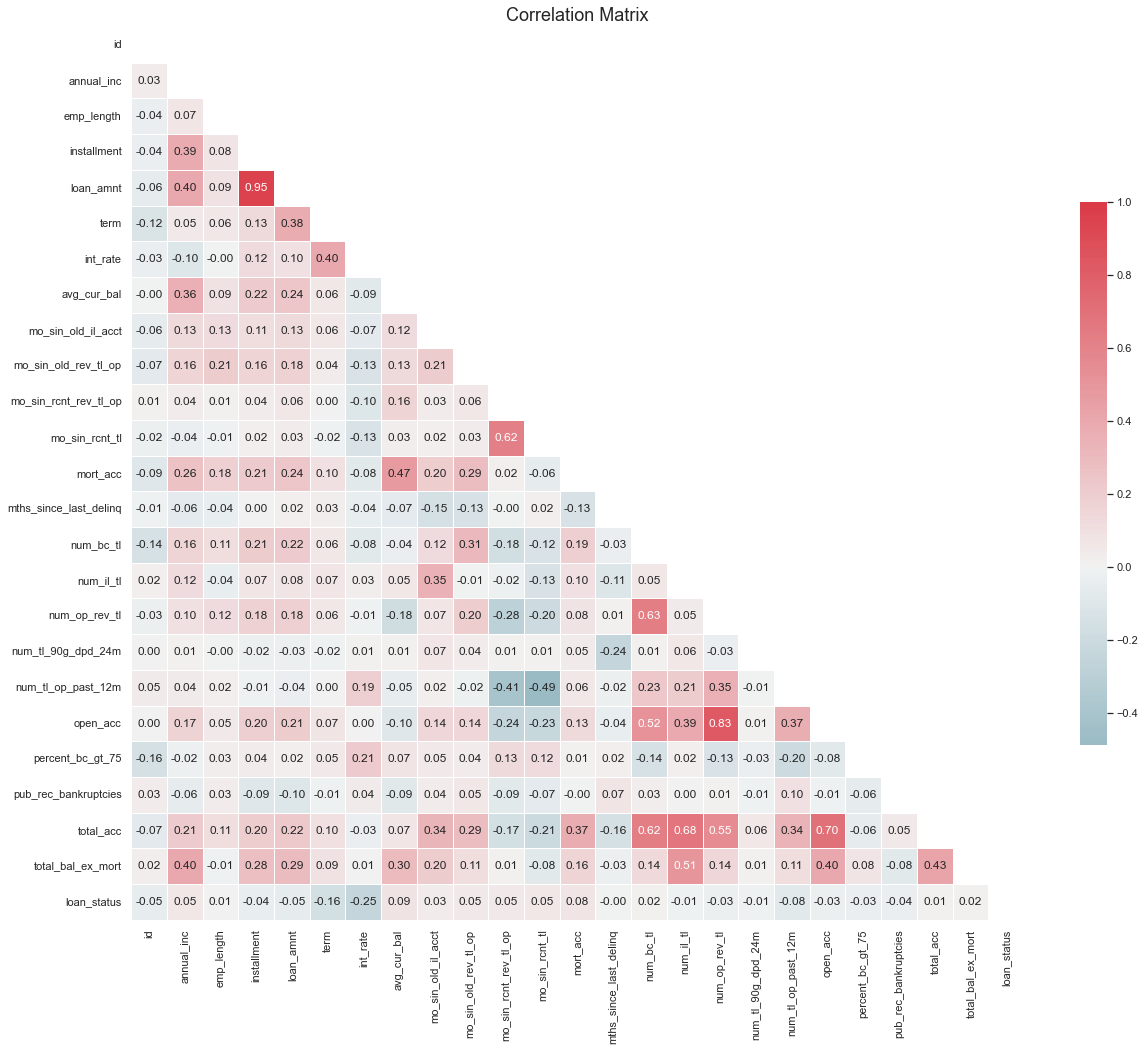

In [33]:
sns.set(style="white")
corr = data2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [34]:
del data3['id']
del data3['addr_state']
del data3['home_ownership']
del data3['purpose']

In [35]:
y = data3.pop('loan_status')
x = data3

In [36]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(x, y)

As seen, 'annual_inc', 'avg_cur_bal', 'loan_amnt', 'total_bal_ex_mort', 'installment', 'mo_sin_old_rev_tl_op', 'term', 'mo_sin_rcnt_rev_tl_op' are the top 8 features that most relavent to the loan status that have much higher score than the others. Note that the score for the interest rate is lower than expected is due to the maginitude of interest rate is small.

In [38]:
df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

df_feature_scores = pd.concat([df_columns, df_scores], axis = 1)
df_feature_scores.columns = ['feature_name', 'score']
df_feature_scores
df_feature_scores.sort_values(by = 'score', ascending=False)

,feature_name,score
0,annual_inc,2.799793e+06
6,avg_cur_bal,2.673831e+06
3,loan_amnt,2.947845e+05
22,total_bal_ex_mort,2.094772e+05
2,installment,5.638229e+03
8,mo_sin_old_rev_tl_op,2.421896e+03
4,term,1.337142e+03
9,mo_sin_rcnt_rev_tl_op,1.017097e+03
19,percent_bc_gt_75,5.194793e+02
10,mo_sin_rcnt_tl,5.160504e+02


Now let's look at the distributions of each selected variables to identify outliers.<br><br>
Annual income:<br>
The outliers of annual income data is visualised by the box figure. The outliers are removed.

Max_annual_inc = 2616000.00 || Mean_annual_inc = 80176.11 || Std_annual_inc =  64873.45


<AxesSubplot:>

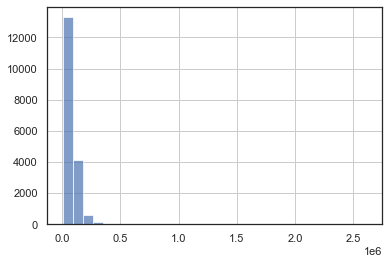

In [39]:
print("Max_annual_inc = %.2f || Mean_annual_inc = %.2f || Std_annual_inc =  %.2f" % (np.max(data.annual_inc), data.annual_inc.mean(), data.annual_inc.std()))
data.annual_inc.hist(bins=30, alpha = 0.7)

Outlier percentage: 5.50 %


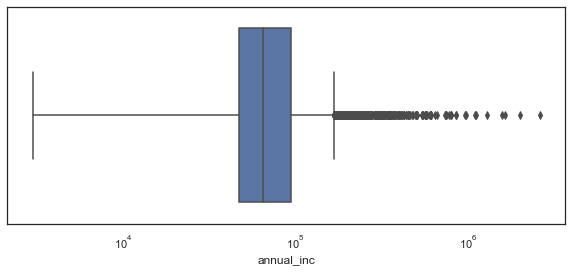

In [40]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data['annual_inc'])
outliers = [y for stat in boxplot_stats(data['annual_inc']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [41]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR

data2 = data2[~((data2.annual_inc < (Q1.annual_inc - 1.5 * IQR.annual_inc)) |(data2.annual_inc > (Q3.annual_inc + 1.5 * IQR.annual_inc)))]
data2.shape

(17317, 28)

With outliers removed, the distribution of annual income is closer to normal distribution

Max_annual_inc = 167000.00 || Mean_annual_inc = 69891.55 || Std_annual_inc =  32115.05


<AxesSubplot:>

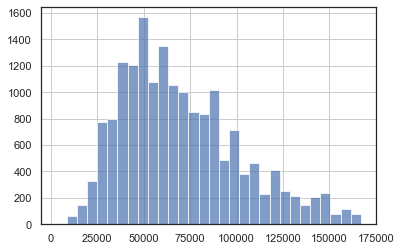

In [42]:
print("Max_annual_inc = %.2f || Mean_annual_inc = %.2f || Std_annual_inc =  %.2f" % (np.max(data2.annual_inc), data2.annual_inc.mean(), data2.annual_inc.std()))
data2.annual_inc.hist(bins=30, alpha = 0.7)

2. Average current balance of all current credit lending products / accounts <br>
Using the same way, we can handle all the outliers.

Max_avg_cur_bal = 341236.00 || Min_avg_cur_bal = 0.00 || Mean_avg_cur_bal = 13466.60 || Std_avg_cur_bal =  16293.10


<AxesSubplot:>

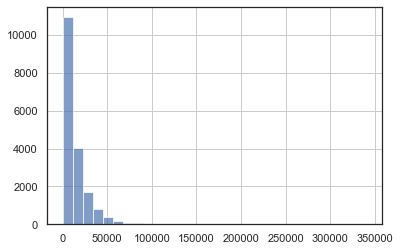

In [43]:
print("Max_avg_cur_bal = %.2f || Min_avg_cur_bal = %.2f || Mean_avg_cur_bal = %.2f || Std_avg_cur_bal =  %.2f" % (np.max(data.avg_cur_bal), np.min(data.avg_cur_bal), data.avg_cur_bal.mean(), data.avg_cur_bal.std()))
data.avg_cur_bal.hist(bins=30, alpha = 0.7)

Outlier percentage: 6.17 %


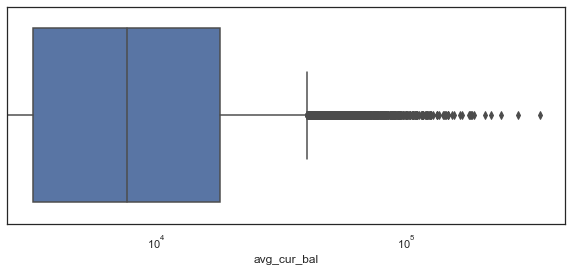

In [44]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data['avg_cur_bal'])
outliers = [y for stat in boxplot_stats(data['avg_cur_bal']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [45]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.avg_cur_bal < (Q1.avg_cur_bal - 1.5 * IQR.avg_cur_bal)) |(data2.avg_cur_bal > (Q3.avg_cur_bal + 1.5 * IQR.avg_cur_bal)))]
data2.shape

(16290, 28)

Max_avg_cur_bal = 37027.00 || Min_avg_cur_bal = 0.00 || Mean_avg_cur_bal = 9772.20 || Std_avg_cur_bal =  8765.89


<AxesSubplot:>

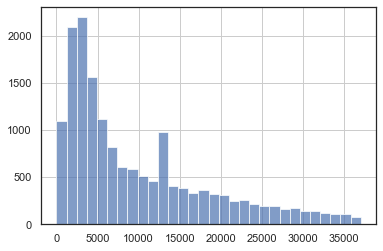

In [46]:
print("Max_avg_cur_bal = %.2f || Min_avg_cur_bal = %.2f || Mean_avg_cur_bal = %.2f || Std_avg_cur_bal =  %.2f" % (np.max(data2.avg_cur_bal), np.min(data.avg_cur_bal), data2.avg_cur_bal.mean(), data2.avg_cur_bal.std()))
data2.avg_cur_bal.hist(bins=30, alpha = 0.7)

3. The listed amount of the loan applied for by the borrower

Max_loan_amnt = 40000.00 || Mean_loan_amnt = 15522.66 || Std_loan_amnt =  9349.29


<AxesSubplot:>

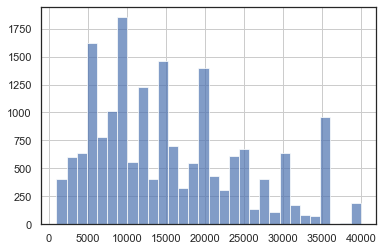

In [47]:
print("Max_loan_amnt = %.2f || Mean_loan_amnt = %.2f || Std_loan_amnt =  %.2f" % (np.max(data.loan_amnt), data.loan_amnt.mean(), data.loan_amnt.std()))
data.loan_amnt.hist(bins=30, alpha = 0.7)

Outlier percentage: 0.00 %


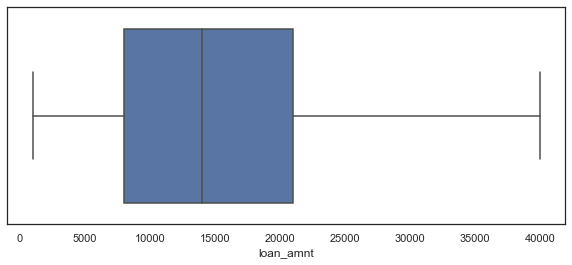

In [48]:
fig, ax= plt.subplots(figsize=(10, 4))
# ax.set_xscale('log')
sns.boxplot(x=data['loan_amnt'])
outliers = [y for stat in boxplot_stats(data['loan_amnt']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

4. Installment

Max_installment = 1503.89 || Mean_installment = 467.54 || Std_installment =  278.10


<AxesSubplot:>

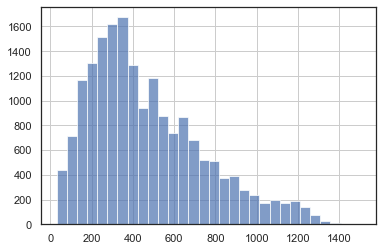

In [49]:
print("Max_installment = %.2f || Mean_installment = %.2f || Std_installment =  %.2f" % (np.max(data.installment), data.installment.mean(), data.installment.std()))
data.installment.hist(bins=30, alpha = 0.7)

Outlier percentage: 1.69 %


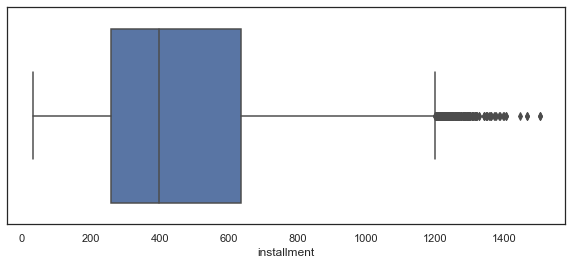

In [50]:
fig, ax= plt.subplots(figsize=(10, 4))
# ax.set_xscale('log')
sns.boxplot(x=data['installment'])
outliers = [y for stat in boxplot_stats(data['installment']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [51]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.installment < (Q1.installment - 1.5 * IQR.installment)) |(data2.installment > (Q3.installment + 1.5 * IQR.installment)))]
data2.shape

(15913, 28)

Max_installment = 1120.18 || Mean_installment = 426.79 || Std_installment =  237.98


<AxesSubplot:>

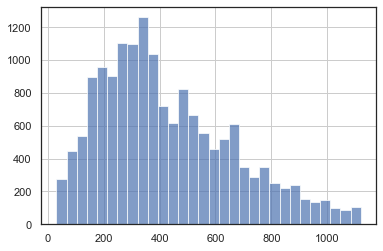

In [52]:
print("Max_installment = %.2f || Mean_installment = %.2f || Std_installment =  %.2f" % (np.max(data2.installment), data2.installment.mean(), data2.installment.std()))
data2.installment.hist(bins=30, alpha = 0.7)

5. Total credit balance excluding mortgage

Max_total_bal_ex_mort = 1501187.00 || Min_total_bal_ex_mort = 0.00
Mean_total_bal_ex_mort = 51489.15 || Std_total_bal_ex_mort =  49160.71


<AxesSubplot:>

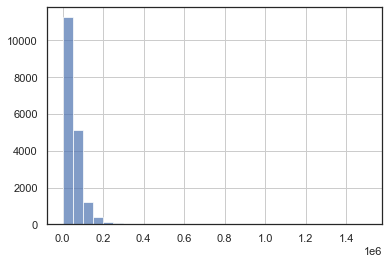

In [53]:
print("Max_total_bal_ex_mort = %.2f || Min_total_bal_ex_mort = %.2f" % (np.max(data.total_bal_ex_mort), np.min(data.total_bal_ex_mort)))
print("Mean_total_bal_ex_mort = %.2f || Std_total_bal_ex_mort =  %.2f" % (data.total_bal_ex_mort.mean(), data.total_bal_ex_mort.std()))
data.total_bal_ex_mort.hist(bins=30, alpha = 0.7)

Outlier percentage: 5.98 %


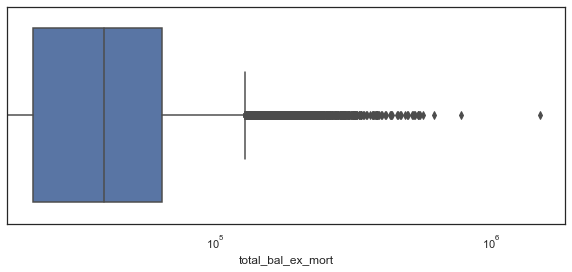

In [54]:
fig, ax= plt.subplots(figsize=(10, 4))
ax.set_xscale('log')
sns.boxplot(x=data['total_bal_ex_mort'])
outliers = [y for stat in boxplot_stats(data['total_bal_ex_mort']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [55]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.total_bal_ex_mort < (Q1.total_bal_ex_mort - 1.5 * IQR.total_bal_ex_mort)) |(data2.total_bal_ex_mort > (Q3.total_bal_ex_mort + 1.5 * IQR.total_bal_ex_mort)))]
data2.shape

(15127, 28)

Max_total_bal_ex_mort = 116038.00 || Min_total_bal_ex_mort = 0.00
Mean_total_bal_ex_mort = 39994.51 || Std_total_bal_ex_mort =  25698.61


<AxesSubplot:>

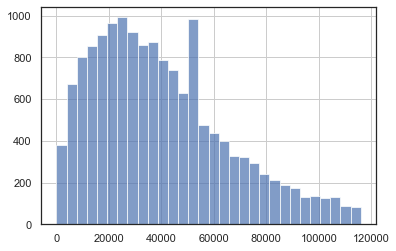

In [56]:
print("Max_total_bal_ex_mort = %.2f || Min_total_bal_ex_mort = %.2f" % (np.max(data2.total_bal_ex_mort), np.min(data2.total_bal_ex_mort)))
print("Mean_total_bal_ex_mort = %.2f || Std_total_bal_ex_mort =  %.2f" % (data2.total_bal_ex_mort.mean(), data2.total_bal_ex_mort.std()))
data2.total_bal_ex_mort.hist(bins=30, alpha = 0.7)

6. Months since oldest revolving account opened

Max_mo_sin_old_rev_tl_op = 674.00 || Min_mo_sin_old_rev_tl_op = 5.00
Mean_mo_sin_old_rev_tl_op = 180.75 || Std_mo_sin_old_rev_tl_op =  93.65


<AxesSubplot:>

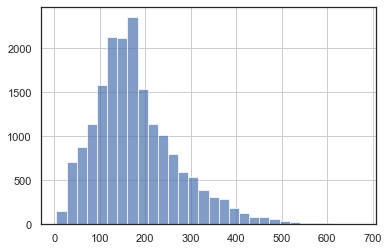

In [57]:
print("Max_mo_sin_old_rev_tl_op = %.2f || Min_mo_sin_old_rev_tl_op = %.2f" % (np.max(data.mo_sin_old_rev_tl_op), np.min(data.mo_sin_old_rev_tl_op)))
print("Mean_mo_sin_old_rev_tl_op = %.2f || Std_mo_sin_old_rev_tl_op =  %.2f" % (data.mo_sin_old_rev_tl_op.mean(), data.mo_sin_old_rev_tl_op.std()))
data.mo_sin_old_rev_tl_op.hist(bins=30, alpha = 0.7)

Outlier percentage: 3.11 %


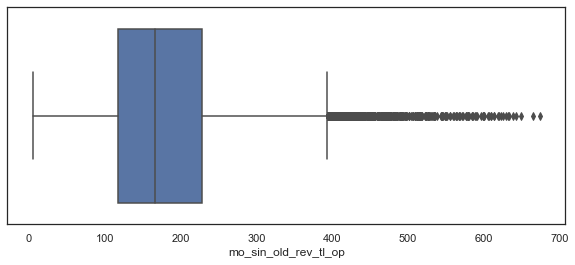

In [58]:
fig, ax= plt.subplots(figsize=(10, 4))
# ax.set_xscale('log')
sns.boxplot(x=data['mo_sin_old_rev_tl_op'])
outliers = [y for stat in boxplot_stats(data['mo_sin_old_rev_tl_op']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [59]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.mo_sin_old_rev_tl_op < (Q1.mo_sin_old_rev_tl_op - 1.5 * IQR.mo_sin_old_rev_tl_op)) |(data2.mo_sin_old_rev_tl_op > (Q3.mo_sin_old_rev_tl_op + 1.5 * IQR.mo_sin_old_rev_tl_op)))]
data2.shape

(14559, 28)

Max_mo_sin_old_rev_tl_op = 378.00 || Min_mo_sin_old_rev_tl_op = 5.00
Mean_mo_sin_old_rev_tl_op = 164.80 || Std_mo_sin_old_rev_tl_op =  77.22


<AxesSubplot:>

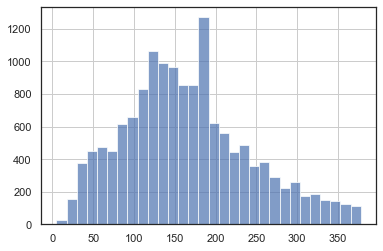

In [60]:
print("Max_mo_sin_old_rev_tl_op = %.2f || Min_mo_sin_old_rev_tl_op = %.2f" % (np.max(data2.mo_sin_old_rev_tl_op), np.min(data2.mo_sin_old_rev_tl_op)))
print("Mean_mo_sin_old_rev_tl_op = %.2f || Std_mo_sin_old_rev_tl_op =  %.2f" % (data2.mo_sin_old_rev_tl_op.mean(), data2.mo_sin_old_rev_tl_op.std()))
data2.mo_sin_old_rev_tl_op.hist(bins=30, alpha = 0.7)

7. term: The number of payments on the loan. Values are in months and can be either 36 or 60.

Mean_term = 42.82


<AxesSubplot:>

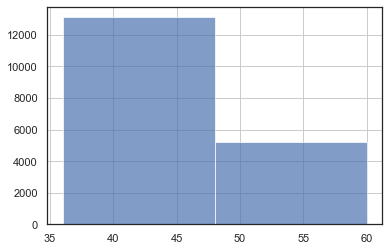

In [61]:
print("Mean_term = %.2f" % data.term.mean())
data.term.hist(bins=2, alpha = 0.7)

8. Months since most recent revolving account opened

Max_mo_sin_rcnt_rev_tl_op = 182.00 || Min_mo_sin_rcnt_rev_tl_op = 0.00
Mean_mo_sin_rcnt_rev_tl_op = 13.08 || Std_mo_sin_rcnt_rev_tl_op =  16.24


<AxesSubplot:>

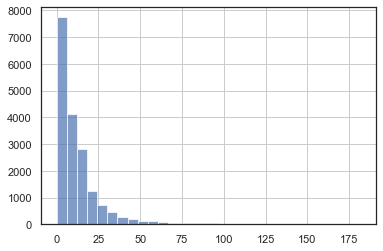

In [62]:
print("Max_mo_sin_rcnt_rev_tl_op = %.2f || Min_mo_sin_rcnt_rev_tl_op = %.2f" % (np.max(data.mo_sin_rcnt_rev_tl_op), np.min(data.mo_sin_rcnt_rev_tl_op)))
print("Mean_mo_sin_rcnt_rev_tl_op = %.2f || Std_mo_sin_rcnt_rev_tl_op =  %.2f" % (data.mo_sin_rcnt_rev_tl_op.mean(), data.mo_sin_rcnt_rev_tl_op.std()))
data.mo_sin_rcnt_rev_tl_op.hist(bins=30, alpha = 0.7)

Outlier percentage: 8.62 %


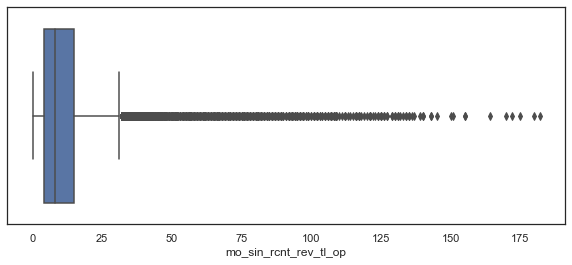

In [63]:
fig, ax= plt.subplots(figsize=(10, 4))
sns.boxplot(x=data['mo_sin_rcnt_rev_tl_op'])
outliers = [y for stat in boxplot_stats(data['mo_sin_rcnt_rev_tl_op']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [64]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.mo_sin_rcnt_rev_tl_op < (Q1.mo_sin_rcnt_rev_tl_op - 1.5 * IQR.mo_sin_rcnt_rev_tl_op)) |(data2.mo_sin_rcnt_rev_tl_op > (Q3.mo_sin_rcnt_rev_tl_op + 1.5 * IQR.mo_sin_rcnt_rev_tl_op)))]
data2.shape

(13463, 28)

Max_mo_sin_rcnt_rev_tl_op = 31.00 || Min_mo_sin_rcnt_rev_tl_op = 0.00
Mean_mo_sin_rcnt_rev_tl_op = 9.04 || Std_mo_sin_rcnt_rev_tl_op =  7.11


<AxesSubplot:>

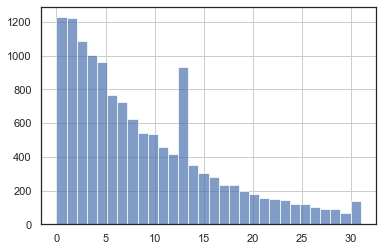

In [65]:
print("Max_mo_sin_rcnt_rev_tl_op = %.2f || Min_mo_sin_rcnt_rev_tl_op = %.2f" % (np.max(data2.mo_sin_rcnt_rev_tl_op), np.min(data2.mo_sin_rcnt_rev_tl_op)))
print("Mean_mo_sin_rcnt_rev_tl_op = %.2f || Std_mo_sin_rcnt_rev_tl_op =  %.2f" % (data2.mo_sin_rcnt_rev_tl_op.mean(), data2.mo_sin_rcnt_rev_tl_op.std()))
data2.mo_sin_rcnt_rev_tl_op.hist(bins=30, alpha = 0.7)

9. Interest rate

Max_int_rate = 0.31 || Min_int_rate = 0.05
Mean_int_rate = 0.14 || Std_int_rate =  0.05


<AxesSubplot:>

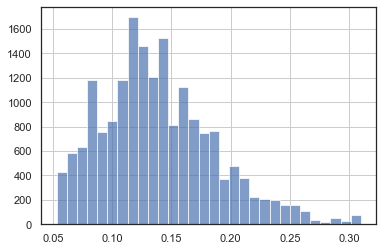

In [66]:
print("Max_int_rate = %.2f || Min_int_rate = %.2f" % (np.max(data.int_rate), np.min(data.int_rate)))
print("Mean_int_rate = %.2f || Std_int_rate =  %.2f" % (data.int_rate.mean(), data.int_rate.std()))
data.int_rate.hist(bins=30, alpha = 0.7)

Outlier percentage: 1.10 %


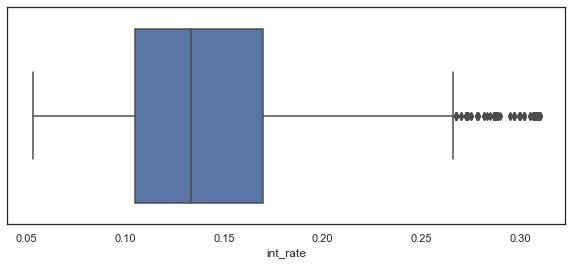

In [67]:
fig, ax= plt.subplots(figsize=(10, 4))
sns.boxplot(x=data['int_rate'])
outliers = [y for stat in boxplot_stats(data['int_rate']) for y in stat['fliers']]
print('Outlier percentage: %.2f %%' % (len(outliers)/len(data)*100))

In [68]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
outlier_step = 1.5*IQR
data2 = data2[~((data2.int_rate < (Q1.int_rate - 1.5 * IQR.int_rate)) |(data2.int_rate > (Q3.int_rate + 1.5 * IQR.int_rate)))]
data2.shape

(13253, 28)

Max_int_rate = 0.26 || Min_int_rate = 0.05
Mean_int_rate = 0.14 || Std_int_rate =  0.04


<AxesSubplot:>

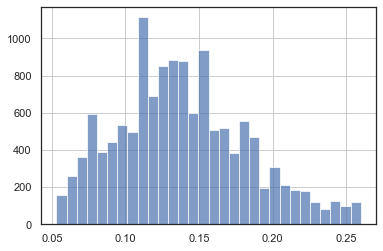

In [69]:
print("Max_int_rate = %.2f || Min_int_rate = %.2f" % (np.max(data2.int_rate), np.min(data2.int_rate)))
print("Mean_int_rate = %.2f || Std_int_rate =  %.2f" % (data2.int_rate.mean(), data2.int_rate.std()))
data2.int_rate.hist(bins=30, alpha = 0.7)

Now let's look at the information of the data after outliers been removed. Totally 13253 data remains.

In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13253 entries, 0 to 18322
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13253 non-null  int64  
 1   addr_state              13253 non-null  object 
 2   annual_inc              13253 non-null  float64
 3   emp_length              13253 non-null  float64
 4   home_ownership          13253 non-null  object 
 5   installment             13253 non-null  float64
 6   loan_amnt               13253 non-null  int64  
 7   purpose                 13253 non-null  object 
 8   term                    13253 non-null  int64  
 9   int_rate                13253 non-null  float64
 10  avg_cur_bal             13253 non-null  float64
 11  mo_sin_old_il_acct      13253 non-null  float64
 12  mo_sin_old_rev_tl_op    13253 non-null  float64
 13  mo_sin_rcnt_rev_tl_op   13253 non-null  float64
 14  mo_sin_rcnt_tl          13253 non-null

Now let's construct a new data frame that contains only the features we selected.

In [71]:
data_new = pd.concat([data2.annual_inc, data2.avg_cur_bal, data2.loan_amnt, data2.total_bal_ex_mort, data2.installment, data2.mo_sin_old_rev_tl_op, data2.term, data2.mo_sin_rcnt_rev_tl_op, data2.int_rate, data2.home_ownership, data2.loan_status], axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13253 entries, 0 to 18322
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   annual_inc             13253 non-null  float64
 1   avg_cur_bal            13253 non-null  float64
 2   loan_amnt              13253 non-null  int64  
 3   total_bal_ex_mort      13253 non-null  float64
 4   installment            13253 non-null  float64
 5   mo_sin_old_rev_tl_op   13253 non-null  float64
 6   term                   13253 non-null  int64  
 7   mo_sin_rcnt_rev_tl_op  13253 non-null  float64
 8   int_rate               13253 non-null  float64
 9   home_ownership         13253 non-null  object 
 10  loan_status            13253 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 1.2+ MB


In [72]:
data_new.describe()

,annual_inc,avg_cur_bal,loan_amnt,total_bal_ex_mort,installment,mo_sin_old_rev_tl_op,term,mo_sin_rcnt_rev_tl_op,int_rate,loan_status
count,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000,13253.000000
mean,65698.122055,9215.095360,13906.404210,40021.379142,416.908903,163.781987,42.667773,9.049964,0.138790,0.778390
std,29765.842532,8522.136085,8215.805548,25597.288275,232.370366,77.125938,10.750632,7.111443,0.044319,0.415346
min,3000.000000,0.000000,1000.000000,0.000000,30.650000,5.000000,36.000000,0.000000,0.053100,0.000000
25%,44000.000000,2755.000000,7500.000000,20049.000000,242.150000,110.000000,36.000000,3.000000,0.109100,1.000000
50%,60000.000000,5633.000000,12000.000000,35889.000000,366.020000,157.000000,36.000000,7.000000,0.134900,1.000000
75%,82400.000000,13466.600011,20000.000000,53957.000000,558.990000,207.000000,60.000000,13.077534,0.169900,1.000000
max,167000.000000,37027.000000,40000.000000,116038.000000,1116.540000,378.000000,60.000000,31.000000,0.259900,1.000000


### C. Exploratory Data Analysis 

Now let's explore the relationships between the features, loan status.<br><br>
The joint plots show that only installment and loan amount have high positive relationship, the rest variables seen to be independent. This statement is confirmed by the correlation matrix.

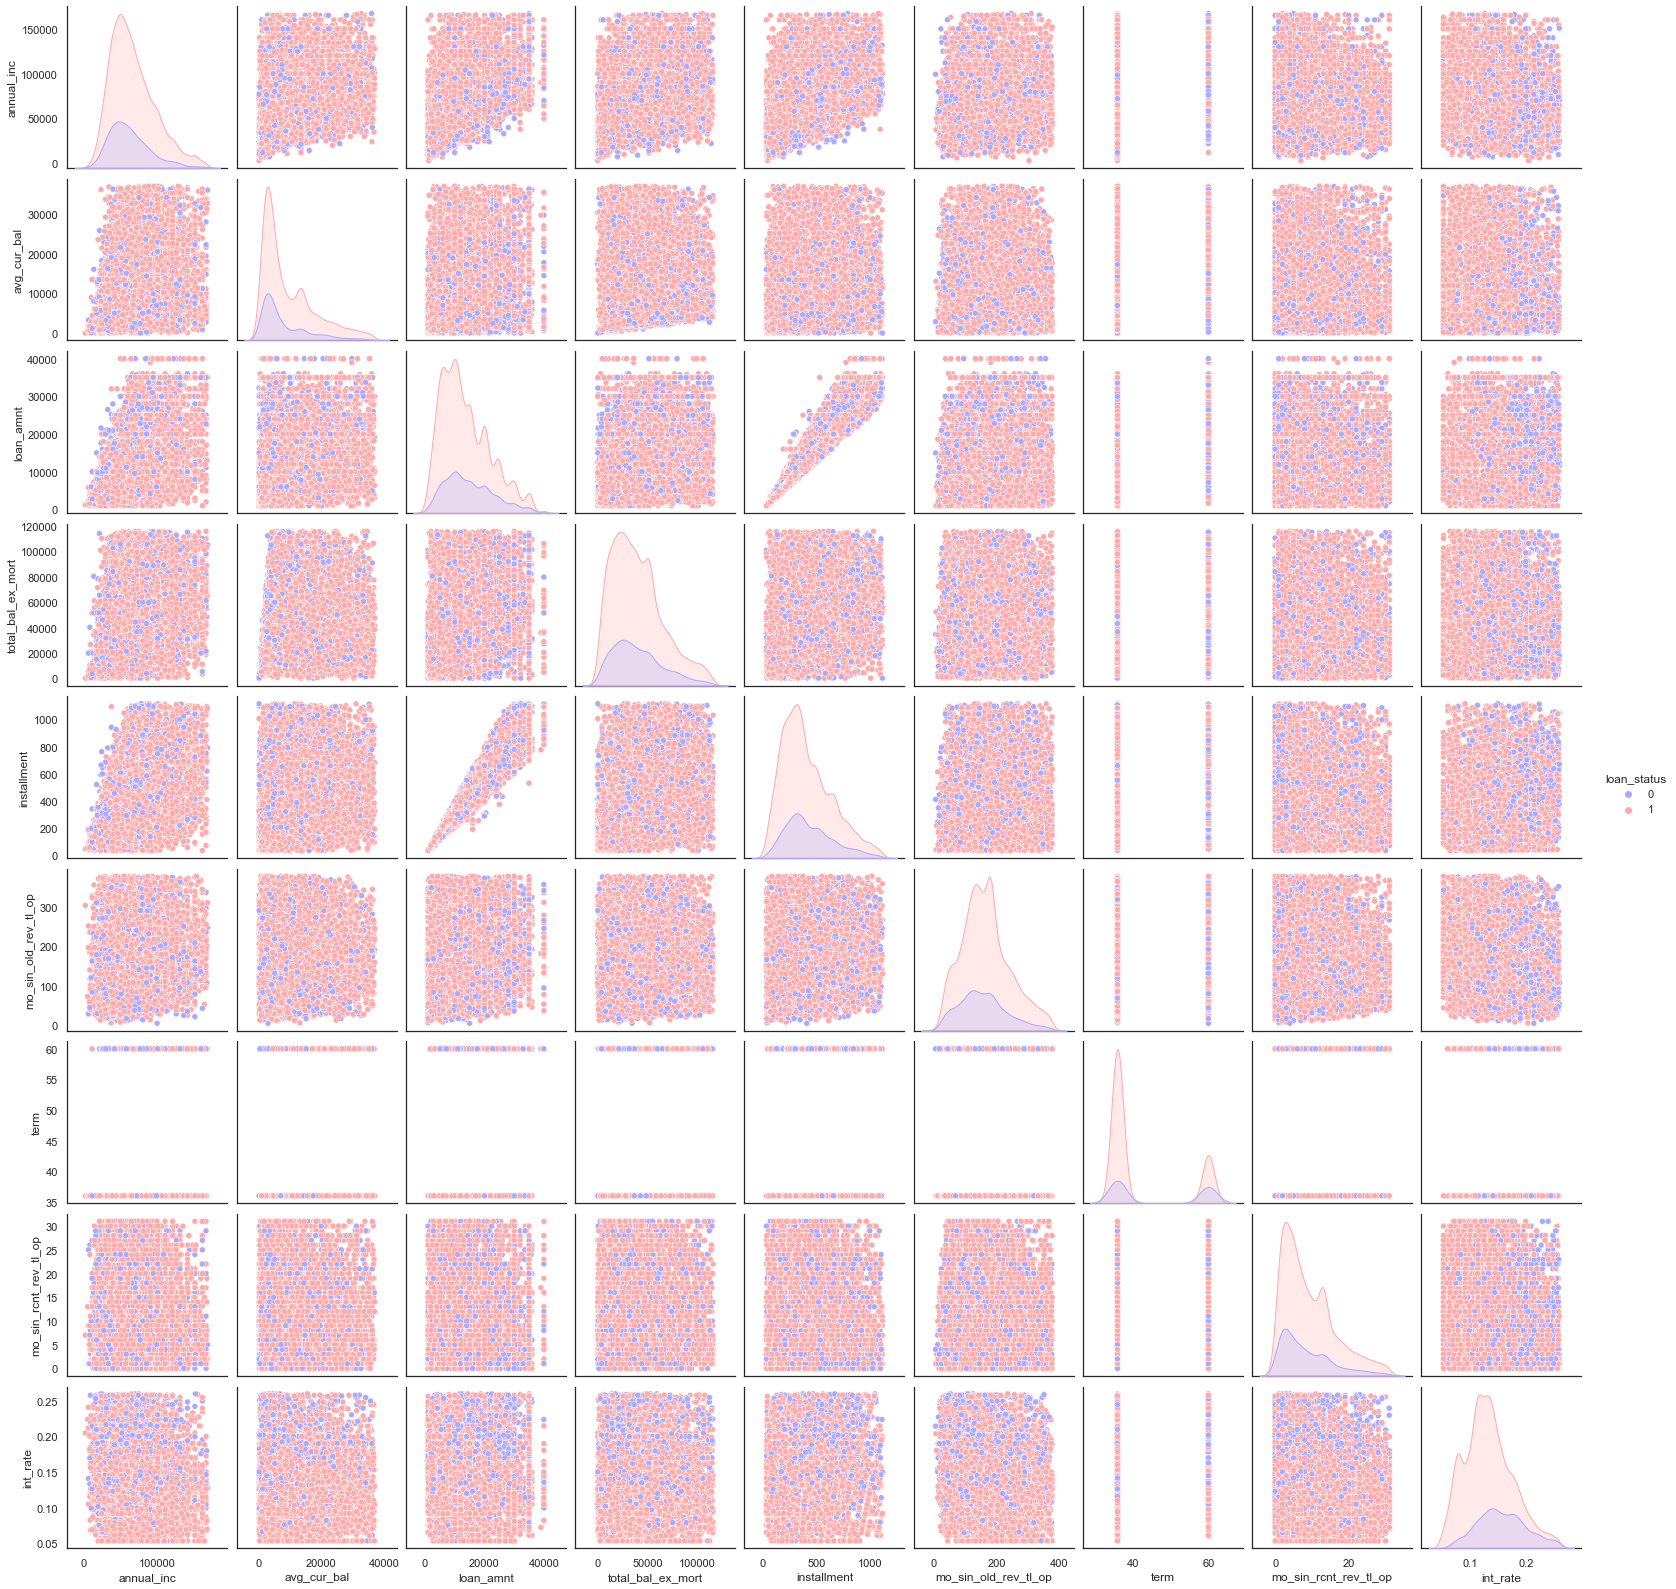

In [73]:
sns.pairplot(data=data_new,hue='loan_status',palette='bwr')

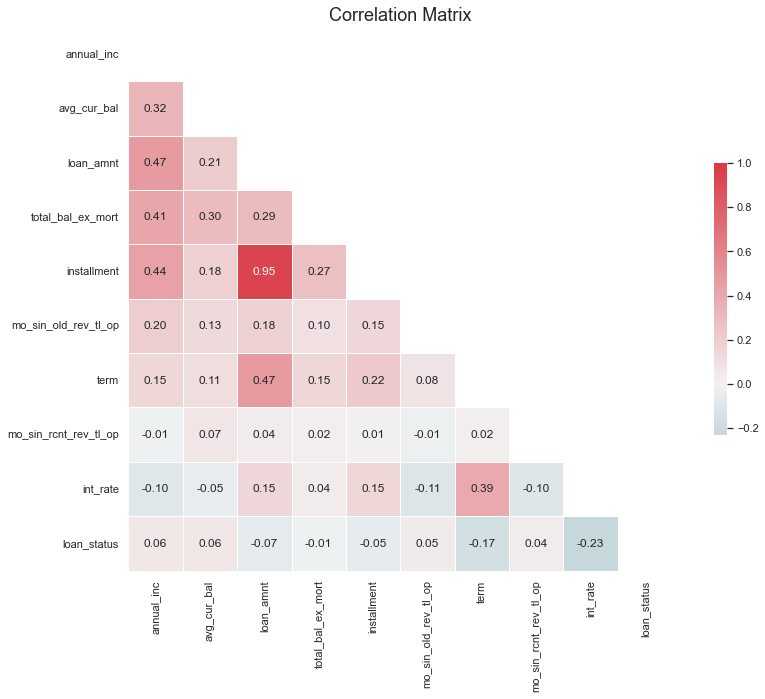

In [74]:
sns.set(style="white")
corr = data_new.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Now let's look at the distribution of 'Fully Paid' and 'Charged Off' customers for each feature.<br><br>
Interestly, for all features the 'Fully Paid' and 'Charged Off' customers share similar distributions, except for interest rate, which shows clealy different mean value between 'Fully Paid' and 'Charged Off' customers (low interest rate seem to encurage customers to pay their loan).

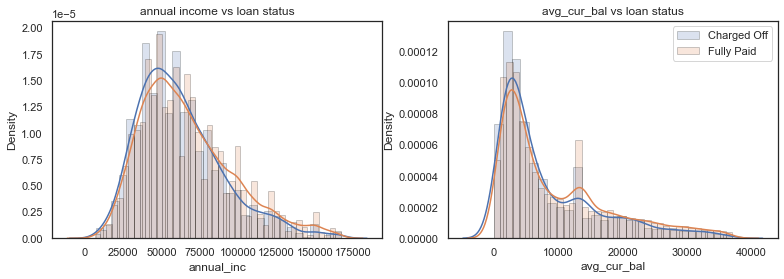

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

con_0 = data_new[data_new['loan_status']==0]['annual_inc']
con_1 = data_new[data_new['loan_status']==1]['annual_inc']
sns.distplot(con_0,label='Charged Off', ax=ax[0],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[0],hist_kws=hist_kws)
ax[0].set_title('annual income vs loan status')

con_0 = data_new[data_new['loan_status']==0]['avg_cur_bal']
con_1 = data_new[data_new['loan_status']==1]['avg_cur_bal']
sns.distplot(con_0,label='Charged Off', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[1],hist_kws=hist_kws)
ax[1].set_title('avg_cur_bal vs loan status')

plt.legend()
plt.show()

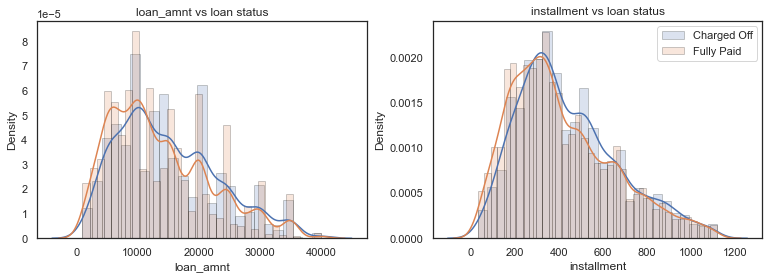

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

ax[0].set_title('loan_amnt vs loan status')
con_0 = data_new[data_new['loan_status']==0]['loan_amnt']
con_1 = data_new[data_new['loan_status']==1]['loan_amnt']
sns.distplot(con_0,label='Charged Off', ax=ax[0],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[0],hist_kws=hist_kws)

ax[1].set_title('installment vs loan status')
con_0 = data_new[data_new['loan_status']==0]['installment']
con_1 = data_new[data_new['loan_status']==1]['installment']
sns.distplot(con_0,label='Charged Off', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[1],hist_kws=hist_kws)

plt.legend()
plt.show()

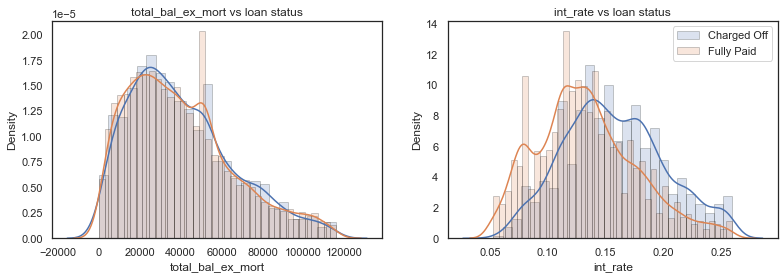

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

ax[0].set_title('total_bal_ex_mort vs loan status')
con_0 = data_new[data_new['loan_status']==0]['total_bal_ex_mort']
con_1 = data_new[data_new['loan_status']==1]['total_bal_ex_mort']
sns.distplot(con_0,label='Charged Off', ax=ax[0],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[0],hist_kws=hist_kws)

ax[1].set_title('int_rate vs loan status')
con_0 = data_new[data_new['loan_status']==0]['int_rate']
con_1 = data_new[data_new['loan_status']==1]['int_rate']
sns.distplot(con_0,label='Charged Off', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[1],hist_kws=hist_kws)

plt.legend()
plt.show()

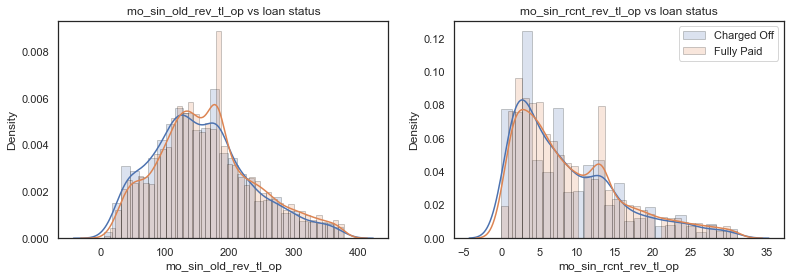

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

ax[0].set_title('mo_sin_old_rev_tl_op vs loan status')
con_0 = data_new[data_new['loan_status']==0]['mo_sin_old_rev_tl_op']
con_1 = data_new[data_new['loan_status']==1]['mo_sin_old_rev_tl_op']
sns.distplot(con_0,label='Charged Off', ax=ax[0],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[0],hist_kws=hist_kws)

ax[1].set_title('mo_sin_rcnt_rev_tl_op vs loan status')
con_0 = data_new[data_new['loan_status']==0]['mo_sin_rcnt_rev_tl_op']
con_1 = data_new[data_new['loan_status']==1]['mo_sin_rcnt_rev_tl_op']
sns.distplot(con_0,label='Charged Off', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Fully Paid', ax=ax[1],hist_kws=hist_kws)

plt.legend()
plt.show()

For categoric variable, count plot can be used to evaluate their relationship with loan status. For instance, customer with smaller number of loan payment term seem to more likly to pay their loan than those with long term; customer with mortgage home seem to more likly to pay their loan than those with rent home.

Text(0.5, 1.0, 'home_ownership vs loan status')

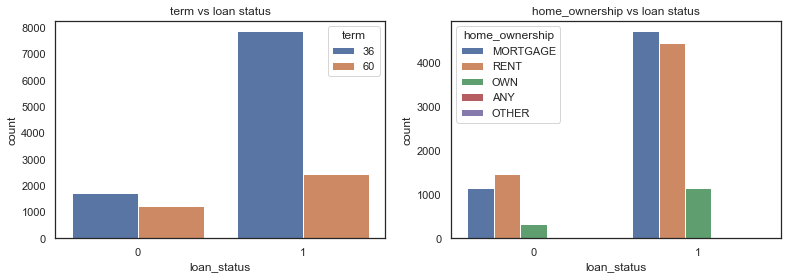

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

sns.countplot(x='loan_status', hue='term', data=data_new, ax=ax[0])
ax[0].set_title('term vs loan status')

sns.countplot(x='loan_status', hue='home_ownership', data=data_new ,ax=ax[1])
ax[1].set_title('home_ownership vs loan status')

## Challeneg 2: Data Science Task

In this task, model will be build for prediction task

### A. Encode categoric variables<br>
Here we use one-hot encoding method.

In [80]:
home_os = pd.get_dummies(data_new['home_ownership'])
home_os.head()

,ANY,MORTGAGE,OTHER,OWN,RENT
0,0,1,0,0,0
1,0,0,0,0,1
4,0,1,0,0,0
5,0,0,0,0,1
8,0,0,0,0,1


In [81]:
data_new.drop(['home_ownership'], axis=1, inplace=True)
data_new = pd.concat([data_new, home_os], axis=1)
data_new.head()

,annual_inc,avg_cur_bal,loan_amnt,total_bal_ex_mort,installment,mo_sin_old_rev_tl_op,term,mo_sin_rcnt_rev_tl_op,int_rate,loan_status,ANY,MORTGAGE,OTHER,OWN,RENT
0,72000.0,13466.600011,12000,51489.151623,395.66,180.750788,36,13.077534,0.1149,1,0,1,0,0,0
1,97500.0,7019.000000,35000,84227.000000,966.47,170.000000,60,28.000000,0.2199,1,0,0,0,0,1
4,58296.0,12321.000000,1200,51794.000000,41.79,145.000000,36,18.000000,0.1531,1,0,1,0,0,0
5,87000.0,5896.000000,24000,50912.000000,629.47,100.000000,60,1.000000,0.1952,0,0,0,0,0,1
8,39500.0,533.000000,8000,4795.000000,272.15,187.000000,36,2.000000,0.1367,1,0,0,0,0,1


### B. Data preperation:<br>
The target, loan status, is seperated as the dependent variable, y. And the rest features are independent variables, x.

In [82]:
y = data_new['loan_status'].values
x = data_new.drop(['loan_status'], 1).values

In [83]:
print(y.shape)
print(x.shape)

(13253,)
(13253, 14)


Then, the data is splited into train and test sets with the ratio of 80:20

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(10602,)
(10602, 14)
(2651,)
(2651, 14)


Finally, data is normalised bt feature scaling, because some variables, such as annual income, have much higher magnitudes than some other variables, such as interest rate. Scaling features can make the model more reliable by not ignoring small maginitude features.

In [85]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### C. Modelling: Logistic regression<br>
The confusion matrix of the logistic regression shows that, this method can predict who pays the loan but failed to predict who does not pay the loan.

In [86]:
LR_model = LogisticRegression(C=1).fit(x_train,y_train)
LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
yhat = LR_model.predict(x_test)

In [88]:
yhat_train = LR_model.predict(x_train)

In [89]:
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))
print(metrics.accuracy_score(y_test,yhat))

[[  38  555]
 [  22 2036]]
              precision    recall  f1-score   support

           0       0.63      0.06      0.12       593
           1       0.79      0.99      0.88      2058

   micro avg       0.78      0.78      0.78      2651
   macro avg       0.71      0.53      0.50      2651
weighted avg       0.75      0.78      0.71      2651

0.7823462844209732


<AxesSubplot:>

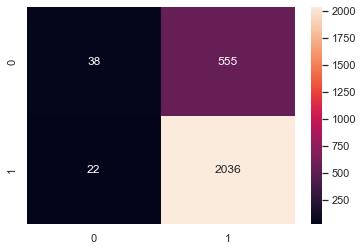

In [90]:
cm = metrics.confusion_matrix(y_test,yhat)
sns.heatmap(cm, annot=True, fmt='d')

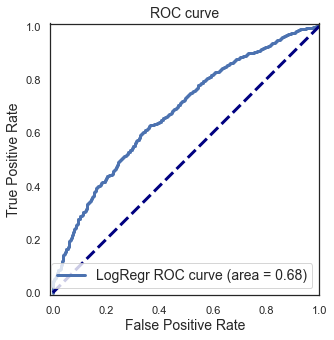

In [91]:
from sklearn.metrics import roc_curve, auc
y_predict_lr_prop= LR_model.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.axes().set_aspect('equal')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

### C. Modelling: Decision Tree<br>
The decision tree model does not seem to outperform logistic regression. To generate more accurate model, the data cleaning step and feature selection step need to be improved.

In [92]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 12)
clf.fit(x_train, y_train)
yhat_f = clf.predict(x_test)
print(metrics.confusion_matrix(y_test,yhat_f))
print(metrics.classification_report(y_test,yhat_f))
print(metrics.accuracy_score(y_test,yhat_f))

[[  88  505]
 [ 178 1880]]
              precision    recall  f1-score   support

           0       0.33      0.15      0.20       593
           1       0.79      0.91      0.85      2058

   micro avg       0.74      0.74      0.74      2651
   macro avg       0.56      0.53      0.53      2651
weighted avg       0.69      0.74      0.70      2651

0.7423613730667673


<AxesSubplot:>

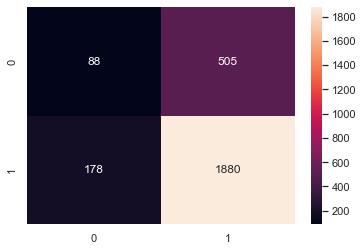

In [93]:
cm_f = metrics.confusion_matrix(y_test,yhat_f)
sns.heatmap(cm_f, annot=True, fmt='d')

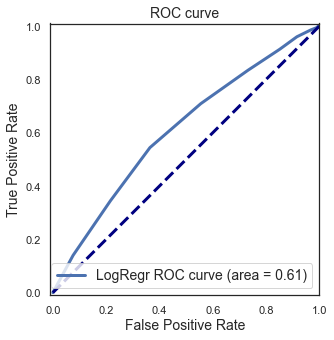

In [94]:
from sklearn.metrics import roc_curve, auc
y_predict_lr_prop= clf.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.axes().set_aspect('equal')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()